## **Customer Lifetime Value (CLV)**

### **Contents**

1. Business Problem Understanding
2. Data Understanding
3. Data Preprocessing
4. Modeling
5. Conclusion
6. Recommendation


****

#### **1. Business Problem Understanding**

##### **Context**

Customer Lifetime Value (CLV) adalah ukuran seberapa bernilai seorang pelanggan bagi sebuah perusahaan. Dari nilai ini, perusahaan dapat menentukan berapa banyak keuntungan yang diperoleh dari satu pelanggan serta biaya yang dikeluarkan untuk mendapatkan atau mempertahankan pelanggan baru. Angka ini sangat penting bagi perusahaan yang ingin menargetkan pemasaran secara efektif kepada pelanggan yang bernilai serta memahami bagaimana perubahan pelanggan perusahaan di masa depan.


##### **Problem Statement**
Di tengah persaingan yang semakin ketat dalam industri asuransi, perusahaan perlu menerapkan strategi yang efektif untuk mempertahankan loyalitas pelanggan. Salah satu tantangan utama adalah mengidentifikasi pelanggan dengan nilai tinggi dan memahami pola perilaku mereka agar dapat meningkatkan pengalaman pengguna serta mengurangi tingkat churn.

##### **Goals**
Berdasarkan permasalahan tersebut, perusahaan asuransi membutuhkan alat yang mampu memprediksi Customer Lifetime Value (CLV). Dengan adanya prediksi CLV yang akurat, perusahaan dapat merancang strategi pemasaran yang lebih efektif, mengalokasikan sumber daya dengan lebih efisien, serta meningkatkan retensi pelanggan.

##### **Analytic Approach**

Pendekatan analitis yang digunakan dalam proyek ini melibatkan eksplorasi data untuk menemukan pola yang dapat membedakan karakteristik pelanggan berdasarkan fitur yang tersedia. 

Model yang akan dikembangkan adalah model regresi, yang dirancang untuk membantu perusahaan dalam memprediksi nilai CLV pelanggan dengan akurat.

##### **Metric Evaluation**

Evaluasi kinerja model akan dilakukan menggunakan metrik berikut:
1. Root Mean Squared Error (RMSE)
   - RMSE mengukur seberapa jauh prediksi dari nilai aktual, dengan penalti lebih besar untuk error yang lebih besar.
   - Nilai lebih kecil lebih baik, karena menunjukkan prediksi lebih dekat ke nilai aktual.

2. Mean Absolute Error (MAE)
   - MAE mengukur rata-rata perbedaan absolut antara prediksi dan nilai aktual.
   - Lebih kecil lebih baik, karena berarti rata-rata kesalahan prediksi lebih rendah.

3. Mean Absolute Percentage Error (MAPE)
   - MAPE mengukur kesalahan dalam bentuk persentase terhadap nilai aktual.
   - Semakin kecil semakin baik, karena menunjukkan prediksi lebih akurat dalam skala relatif.


Dengan menerapkan evaluasi metrik ini, perusahaan dapat memastikan bahwa model prediksi yang dikembangkan memiliki performa yang optimal dan dapat digunakan untuk mendukung pengambilan keputusan bisnis yang lebih baik.

***

#### **2. Data Understanding**

![Dataset CLV](DatasetDescriptionV2.png)

In [1]:
#Import library yang dibutuhkan untuk eksplorasi dataset

import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

# Import library untuk modeling

from sklearn.model_selection import train_test_split, cross_val_score, RandomizedSearchCV, GridSearchCV, KFold

import category_encoders as ce
from sklearn.preprocessing import OneHotEncoder, RobustScaler, OrdinalEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.compose import TransformedTargetRegressor
from xgboost import XGBRegressor

from sklearn.preprocessing import StandardScaler

from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error, mean_absolute_percentage_error

In [2]:
# Load dataset
df = pd.read_csv('data_customer_lifetime_value_fix.csv')
df.head()

,Vehicle Class,Coverage,Renew Offer Type,EmploymentStatus,Marital Status,Education,Number of Policies,Monthly Premium Auto,Total Claim Amount,Income,Customer Lifetime Value
0,Four-Door Car,Extended,Offer1,Retired,Divorced,High School or Below,2.0,90.0,571.479602,11828.0,10083.486880
1,Four-Door Car,Basic,Offer1,Employed,Married,College,6.0,62.0,114.514440,44762.0,4943.386117
2,Two-Door Car,Basic,Offer1,Retired,Married,Master,2.0,62.0,257.248789,21514.0,11981.984810
3,Four-Door Car,Premium,Offer3,Disabled,Married,High School or Below,1.0,116.0,556.800000,17913.0,4550.856045
4,Two-Door Car,Basic,Offer3,Medical Leave,Married,High School or Below,1.0,62.0,355.820799,19030.0,2372.155492


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5669 entries, 0 to 5668
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Vehicle Class            5669 non-null   object 
 1   Coverage                 5669 non-null   object 
 2   Renew Offer Type         5669 non-null   object 
 3   EmploymentStatus         5669 non-null   object 
 4   Marital Status           5669 non-null   object 
 5   Education                5669 non-null   object 
 6   Number of Policies       5669 non-null   float64
 7   Monthly Premium Auto     5669 non-null   float64
 8   Total Claim Amount       5669 non-null   float64
 9   Income                   5669 non-null   float64
 10  Customer Lifetime Value  5669 non-null   float64
dtypes: float64(5), object(6)
memory usage: 487.3+ KB


In [4]:
df.shape

(5669, 11)

In [5]:
df.describe()

,Number of Policies,Monthly Premium Auto,Total Claim Amount,Income,Customer Lifetime Value
count,5669.000000,5669.000000,5669.000000,5669.000000,5669.000000
mean,2.979361,93.026989,431.407103,37868.188569,8029.874592
std,2.393187,34.551795,287.558038,30490.490723,6916.708246
min,1.000000,61.000000,0.423310,0.000000,1898.007675
25%,1.000000,68.000000,266.932542,0.000000,3954.344534
50%,2.000000,82.000000,379.200000,34322.000000,5800.188903
75%,4.000000,109.000000,549.986128,62464.000000,9031.214859
max,9.000000,297.000000,2759.794354,99934.000000,83325.381190


In [6]:
df.describe(include='object')

,Vehicle Class,Coverage,Renew Offer Type,EmploymentStatus,Marital Status,Education
count,5669,5669,5669,5669,5669,5669
unique,6,3,4,5,3,5
top,Four-Door Car,Basic,Offer1,Employed,Married,Bachelor
freq,2858,3477,2292,3541,3305,1703


In [7]:
df.columns

Index(['Vehicle Class', 'Coverage', 'Renew Offer Type', 'EmploymentStatus',
       'Marital Status', 'Education', 'Number of Policies',
       'Monthly Premium Auto', 'Total Claim Amount', 'Income',
       'Customer Lifetime Value'],
      dtype='object')

In [8]:
# deskripsi data customer lifetime value (CLV)

listItem = []
for col in df.columns :
    listItem.append([col, df[col].dtype, df[col].isna().sum(),
                    df[col].nunique(), list(df[col].drop_duplicates().values)]);

dfDesc = pd.DataFrame(columns=['dataFeatures', 'dataType', 'null', 'unique', 'uniqueSample'],
                     data=listItem)
print(df.shape)
dfDesc

(5669, 11)


,dataFeatures,dataType,null,unique,uniqueSample
0,Vehicle Class,object,0,6,"[Four-Door Car, Two-Door Car, SUV, Sports Car,..."
1,Coverage,object,0,3,"[Extended, Basic, Premium]"
2,Renew Offer Type,object,0,4,"[Offer1, Offer3, Offer2, Offer4]"
3,EmploymentStatus,object,0,5,"[Retired, Employed, Disabled, Medical Leave, U..."
4,Marital Status,object,0,3,"[Divorced, Married, Single]"
5,Education,object,0,5,"[High School or Below, College, Master, Bachel..."
6,Number of Policies,float64,0,9,"[2.0, 6.0, 1.0, 8.0, 5.0, 3.0, 7.0, 4.0, 9.0]"
7,Monthly Premium Auto,float64,0,191,"[90.0, 62.0, 116.0, 107.0, 101.0, 66.0, 65.0, ..."
8,Total Claim Amount,float64,0,3274,"[571.479602, 114.51444, 257.248789, 556.8, 355..."
9,Income,float64,0,3625,"[11828.0, 44762.0, 21514.0, 17913.0, 19030.0, ..."


##### **Data Cleansing**

**-- Cek duplikasi data**

In [9]:
df.duplicated().sum()

np.int64(618)

In [10]:
# Melihat data duplikat
df[df.duplicated(keep=False)].sort_values(by=df.columns.tolist()).head(10)

,Vehicle Class,Coverage,Renew Offer Type,EmploymentStatus,Marital Status,Education,Number of Policies,Monthly Premium Auto,Total Claim Amount,Income,Customer Lifetime Value
540,Four-Door Car,Basic,Offer1,Disabled,Divorced,Bachelor,1.0,63.0,352.394515,19864.0,2359.423599
1784,Four-Door Car,Basic,Offer1,Disabled,Divorced,Bachelor,1.0,63.0,352.394515,19864.0,2359.423599
3317,Four-Door Car,Basic,Offer1,Disabled,Divorced,Bachelor,1.0,63.0,352.394515,19864.0,2359.423599
3830,Four-Door Car,Basic,Offer1,Disabled,Divorced,Bachelor,1.0,63.0,352.394515,19864.0,2359.423599
297,Four-Door Car,Basic,Offer1,Disabled,Divorced,Master,2.0,74.0,523.888845,26057.0,8509.850887
2401,Four-Door Car,Basic,Offer1,Disabled,Divorced,Master,2.0,74.0,523.888845,26057.0,8509.850887
3005,Four-Door Car,Basic,Offer1,Disabled,Divorced,Master,2.0,74.0,523.888845,26057.0,8509.850887
4211,Four-Door Car,Basic,Offer1,Disabled,Divorced,Master,2.0,74.0,523.888845,26057.0,8509.850887
5140,Four-Door Car,Basic,Offer1,Disabled,Divorced,Master,2.0,74.0,523.888845,26057.0,8509.850887
1445,Four-Door Car,Basic,Offer1,Disabled,Divorced,Master,3.0,65.0,312.000000,22886.0,5096.673223


Interpretasi

- Terdapat 618 baris duplikasi data yang sama persis
- Selanjutnya, drop data duplicate

In [11]:
df = df.drop_duplicates()
df.shape

(5051, 11)

**-- Cek Missing Values**

In [12]:
df.isnull().sum()

Vehicle Class              0
Coverage                   0
Renew Offer Type           0
EmploymentStatus           0
Marital Status             0
Education                  0
Number of Policies         0
Monthly Premium Auto       0
Total Claim Amount         0
Income                     0
Customer Lifetime Value    0
dtype: int64

In [13]:
df[df['Income'] == 0].shape

(1332, 11)

In [14]:
display(df[df['Income'] == 0][['Income', 'EmploymentStatus']])

,Income,EmploymentStatus
16,0.0,Unemployed
17,0.0,Unemployed
21,0.0,Unemployed
24,0.0,Unemployed
26,0.0,Unemployed
...,...,...
5651,0.0,Unemployed
5652,0.0,Unemployed
5655,0.0,Unemployed
5660,0.0,Unemployed


In [15]:
df[df['Income'] == 0]['EmploymentStatus'].unique()

array(['Unemployed'], dtype=object)

In [16]:
round(1332/len(df)*100,2)

26.37

Interpretasi
- Tidak terdapat missing values berdasarkan pengecekan dengan `.isnull()`.
- Namun, berdasarkan analisis statistik deskriptif pada fitur Income, terdapat **1332 pelanggan dengan penghasilan 0**, yang dapat dianggap sebagai **missing values**.
- **26.37%** dari total data memiliki nilai **Income = 0**.
- Semua pelanggan dengan **Income = 0** ternyata memiliki **status tidak bekerja**.
- Oleh karena itu, pelanggan dengan **Income = 0 dan tidak bekerja sebaiknya dihapus** agar model prediksi lebih akurat.


In [17]:
# Menghapus baris yang memiliki Income = 0 dan Status Unemployed
df.drop(df[(df['Income'] == 0) & (df['EmploymentStatus'] == 'Unemployed')].index, inplace=True)

In [18]:
df.shape

(3719, 11)

In [19]:
df.describe()

,Number of Policies,Monthly Premium Auto,Total Claim Amount,Income,Customer Lifetime Value
count,3719.000000,3719.000000,3719.000000,3719.000000,3719.000000
mean,2.971229,92.621941,368.181442,51256.769024,8215.808035
std,2.376816,34.679880,251.266776,24215.913297,7157.736637
min,1.000000,61.000000,0.423310,10037.000000,2227.072755
25%,1.000000,68.000000,199.824221,29549.500000,4069.927086
50%,2.000000,81.000000,336.000000,49009.000000,5866.068903
75%,4.000000,108.000000,489.597321,70830.500000,9143.072750
max,9.000000,297.000000,2552.343856,99934.000000,83325.381190


##### **EDA: Exploratory Data Analysis**

In [20]:
# categorical features
cat_features = ['Vehicle Class', 'Coverage', 'Renew Offer Type', 'EmploymentStatus', 'Marital Status', 'Education']
cat_features

['Vehicle Class',
 'Coverage',
 'Renew Offer Type',
 'EmploymentStatus',
 'Marital Status',
 'Education']

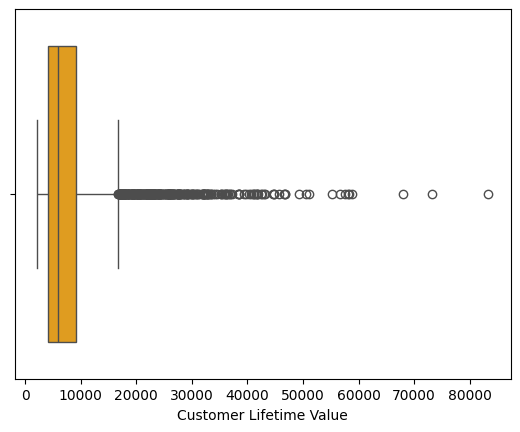

In [21]:
# Distribusi CLV pelanggan
sns.boxplot(x='Customer Lifetime Value', data=df, color='orange');

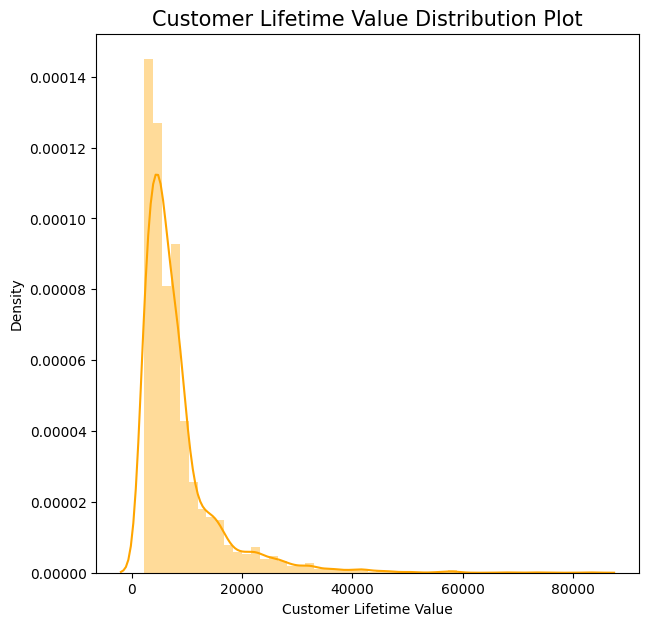

In [22]:
# Plot distribusi fitur 'price'
plt.figure(figsize=(7, 7))
sns.distplot(df['Customer Lifetime Value'], color='orange')
plt.title('Customer Lifetime Value Distribution Plot', size=15);

In [23]:
# Numerical Features
num_features = df[['Number of Policies', 'Monthly Premium Auto', 'Total Claim Amount', 'Income', 'Customer Lifetime Value']]
num_features

,Number of Policies,Monthly Premium Auto,Total Claim Amount,Income,Customer Lifetime Value
0,2.0,90.0,571.479602,11828.0,10083.486880
1,6.0,62.0,114.514440,44762.0,4943.386117
2,2.0,62.0,257.248789,21514.0,11981.984810
3,1.0,116.0,556.800000,17913.0,4550.856045
4,1.0,62.0,355.820799,19030.0,2372.155492
...,...,...,...,...,...
5662,9.0,296.0,498.159874,79655.0,23984.621440
5663,2.0,69.0,446.084760,30595.0,8114.409136
5665,2.0,109.0,523.200000,27778.0,12904.943360
5666,1.0,62.0,44.780402,84658.0,2447.053134


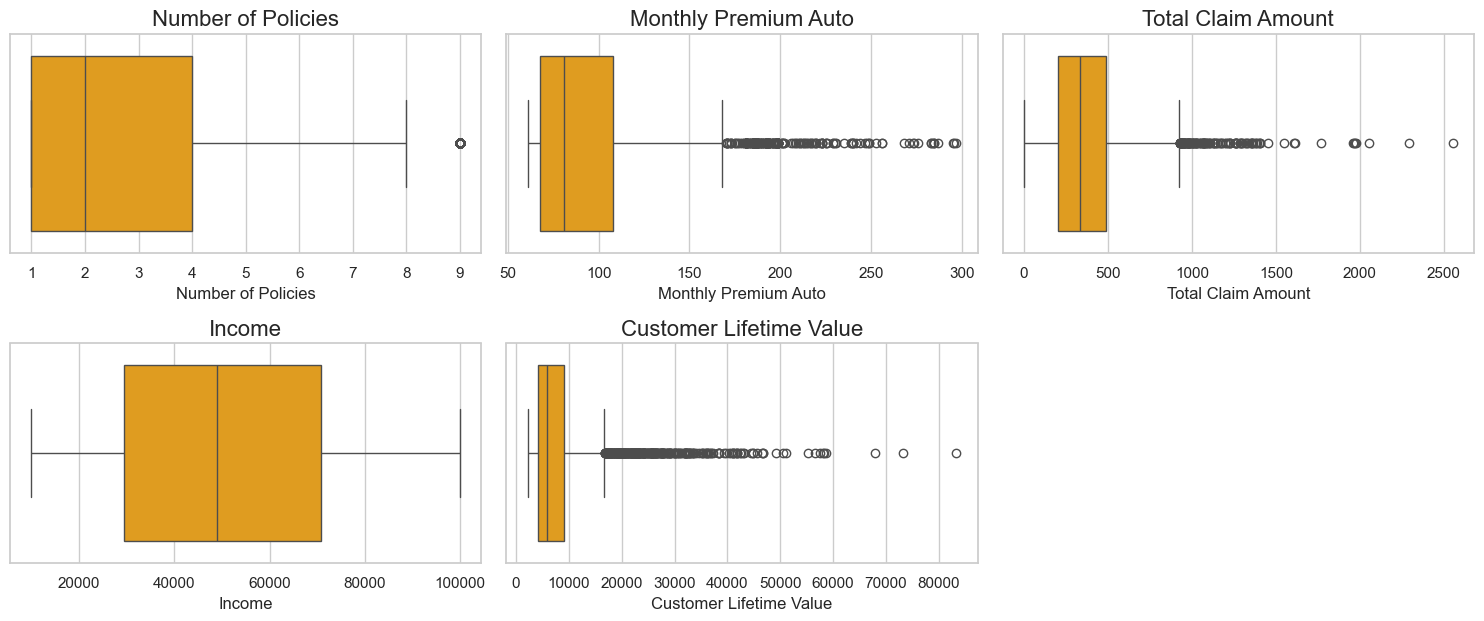

In [24]:
plt.figure(figsize=(15, 9), facecolor='white')
sns.set(style='whitegrid', palette='Oranges')
plotnumber = 1

for feature in num_features:
    ax = plt.subplot(3,3, plotnumber)
    sns.boxplot(x=feature, data=df, color='orange');
    plt.title(feature, fontsize=16)
    plt.tight_layout()
    plotnumber += 1

<Axes: >

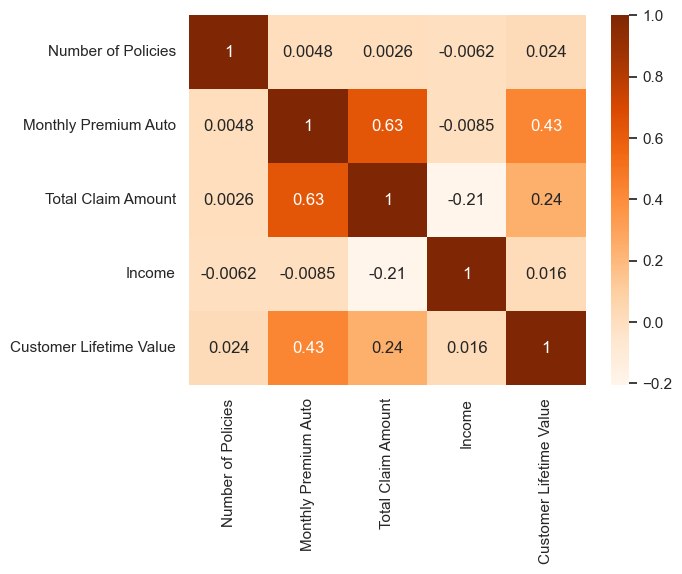

In [25]:
# Cek korelasi antar features numerik
sns.heatmap(num_features.corr(), annot=True, cmap='Oranges')

Berdasarkan heatmap korelasi, terdapat beberapa insight yang dapat diambil:
- **Monthly Premium Auto** memiliki korelasi **paling kuat** dengan **Customer Lifetime Value (CLV)** (0.43). Hal ini menunjukkan bahwa semakin tinggi premi bulanan, semakin besar nilai pelanggan bagi perusahaan.
- **Total Claim Amount** juga memiliki **korelasi positif** dengan CLV (0.24), yang berarti pelanggan dengan jumlah klaim yang lebih besar cenderung memiliki nilai lebih tinggi.
- **Income dan Number of Policies** menunjukkan korelasi yang **sangat lemah** terhadap CLV (0,016 dan 0.024). Hal ini mengindikasikan bahwa jumlah polis yang dimiliki pelanggan dan pendapatan mereka bukan faktor yang signifikan dalam menentukan CLV.
- Terdapat **korelasi cukup kuat** antara **Monthly Premium Auto dan Total Claim Amount** (0.63), yang bisa menunjukkan bahwa pelanggan dengan premi lebih tinggi cenderung mengajukan klaim lebih banyak atau lebih besar.

Dari hasil ini, dapat disimpulkan bahwa **Monthly Premium Auto dan Total Claim Amount** adalah ``fitur yang lebih berpengaruh`` terhadap CLV, sementara **Income dan Number of Policies** memiliki `kontribusi yang lebih rendah`.

<Figure size 500x500 with 0 Axes>

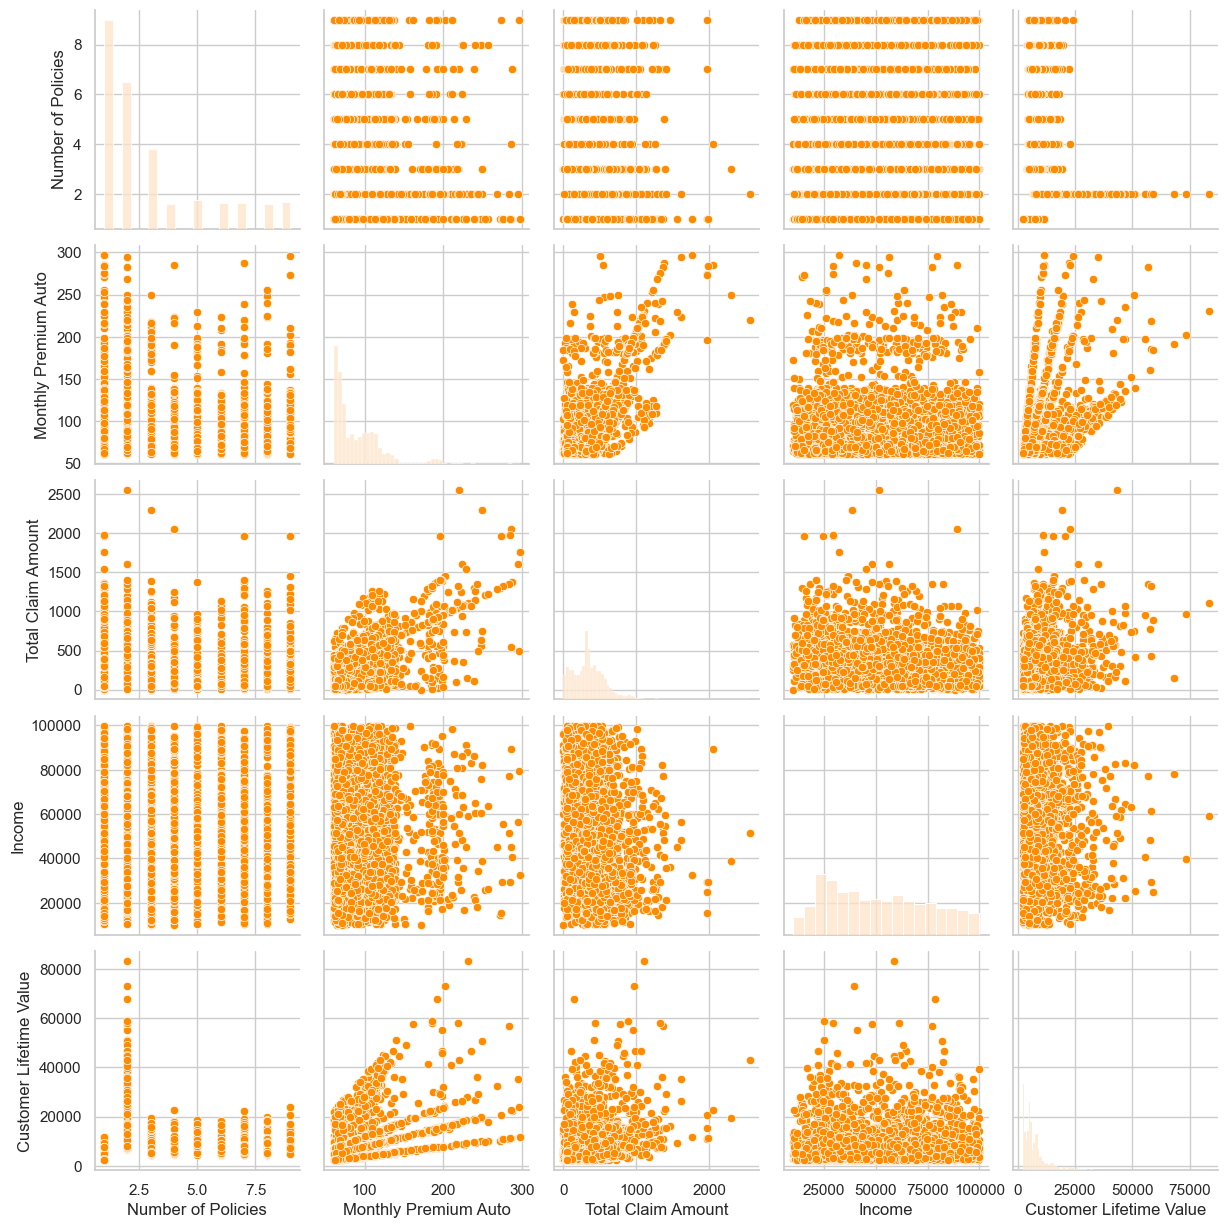

In [26]:
# melihat distribusi + melihat hubungan
plt.figure(figsize = (5,5))
sns.pairplot(df, plot_kws={'color': 'darkorange'})

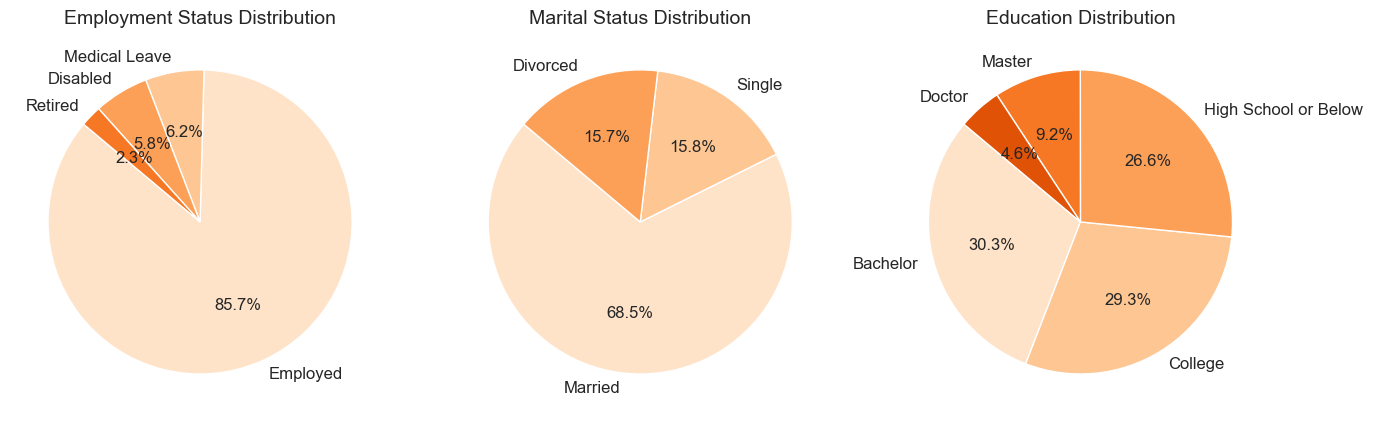

In [27]:
# Melihat karakteristik tiap pelanggan
# Membuat subplot untuk masing-masing pie chart
fig, axs = plt.subplots(1, 3, figsize=(14, 5))

# Daftar kolom dan judulnya
columns = ['EmploymentStatus', 'Marital Status', 'Education']
titles = ['Employment Status Distribution', 'Marital Status Distribution', 'Education Distribution']

# Loop untuk membuat pie chart
for ax, col, title in zip(axs, columns, titles):
    counts = df[col].value_counts()
    wedges, texts, autotexts = ax.pie(counts, labels=counts.index, autopct='%1.1f%%', startangle=140, textprops={'fontsize': 12})
    ax.set_title(title, fontsize=14)
    plt.setp(texts + autotexts, fontsize=12)

# Menampilkan plot
plt.tight_layout()
plt.show()


- Pelanggan dengan CLV tertinggi merupakan pekerja, sudah menikah, dan lulusan sarjana

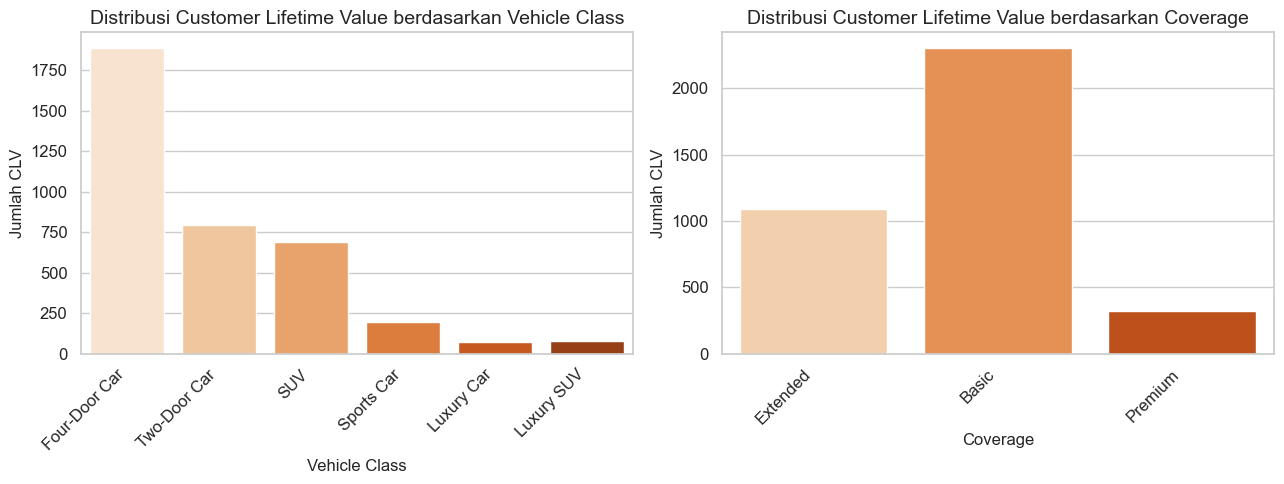

In [28]:
# Membuat figure dan axes untuk subplots
fig, axs = plt.subplots(1, 2, figsize=(13, 5))

# Daftar kolom dan judulnya
columns = ['Vehicle Class', 'Coverage']
titles = ['Distribusi Customer Lifetime Value berdasarkan Vehicle Class', 'Distribusi Customer Lifetime Value berdasarkan Coverage']

# Loop untuk membuat barchart
for ax, col, title in zip(axs, columns, titles):
    sns.countplot(data=df, x=col, palette='Oranges', ax=ax)
    ax.set_title(title, fontsize=14)
    ax.set_xlabel(col, fontsize=12)
    ax.set_ylabel('Jumlah CLV', fontsize=12)
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right', fontsize=12)
    ax.tick_params(axis='y', labelsize=12)

# Menampilkan plot
plt.tight_layout()
plt.show()


- Mayoritas kendaraan yang diasuransikan termasuk dalam kategori Four-Door Class, dengan jenis cakupan asuransi yang paling umum adalah Basic.

In [29]:
# Membuat duplikasi dataframe
df_model = df.copy()

In [30]:
# Cek info lebih detail untuk setiap fitur
listItem = []

for col in df_model.columns:
    listItem.append([col, df_model[col].dtype, df_model[col].isna().sum(), round((df_model[col].isna().sum()/len(df_model[col]))*100, 2),
                    df_model[col].nunique(), list(df_model[col].drop_duplicates().sample(2).values)]);

df_model_desc = pd.DataFrame(columns=['dataFeatures', 'dataType', 'null', 'nullPct', 'unique', 'uniqueSample'],
                     data=listItem)
df_model_desc

,dataFeatures,dataType,null,nullPct,unique,uniqueSample
0,Vehicle Class,object,0,0.0,6,"[Two-Door Car, SUV]"
1,Coverage,object,0,0.0,3,"[Extended, Premium]"
2,Renew Offer Type,object,0,0.0,4,"[Offer1, Offer4]"
3,EmploymentStatus,object,0,0.0,4,"[Employed, Medical Leave]"
4,Marital Status,object,0,0.0,3,"[Married, Divorced]"
5,Education,object,0,0.0,5,"[College, High School or Below]"
6,Number of Policies,float64,0,0.0,9,"[6.0, 1.0]"
7,Monthly Premium Auto,float64,0,0.0,180,"[240.0, 94.0]"
8,Total Claim Amount,float64,0,0.0,2652,"[289.894293, 71.053011]"
9,Income,float64,0,0.0,3624,"[33190.0, 22166.0]"


**-- Deteksi Outliers**

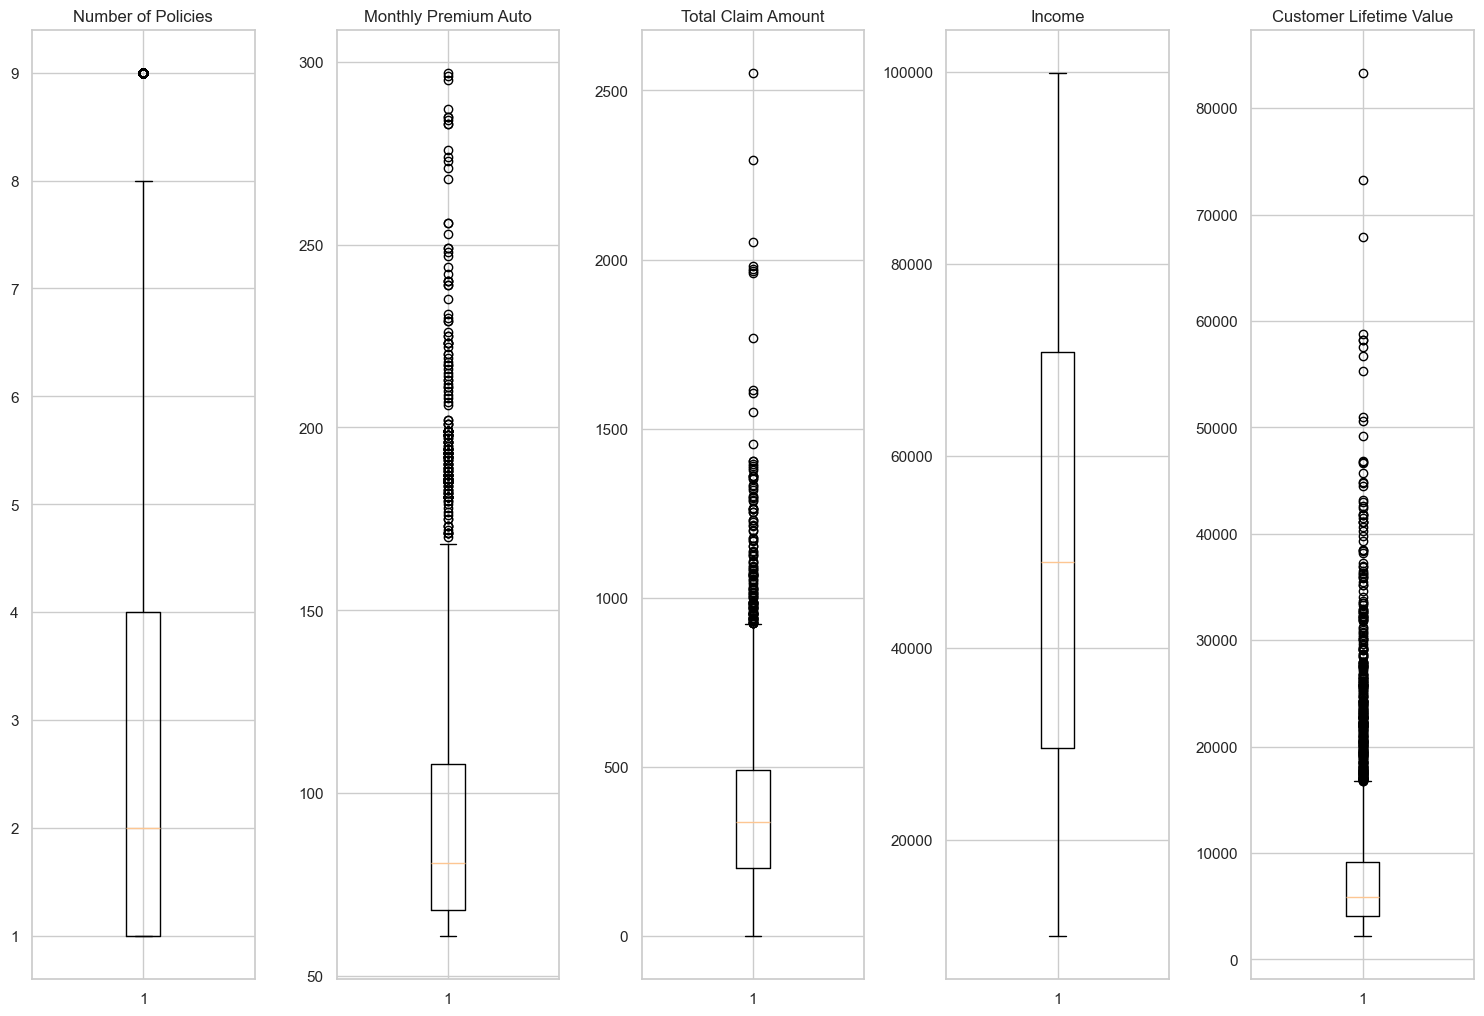

In [31]:
# Boxplot untuk cek outliers
number_col = df_model.select_dtypes(include=['float64', 'int64']).columns
num_col = len(number_col)
num_row = (num_col // 3) + (num_col % 3 > 0)

plt.figure(figsize=(15,20))

for i, column in enumerate(number_col,1) :
    plt.subplot(num_row,5,i)
    plt.boxplot(df_model[column].dropna())
    plt.title(column)

plt.tight_layout()
plt.show()

In [32]:
# Membuat fungsi untuk mengecek outliers
def find_anomalies(data):
    q1 = data.quantile(0.25)
    q3 = data.quantile(0.75)
    iqr = q3 - q1
    limit = iqr*1.5
    print(f'IQR: {iqr}')

    limit_bawah = q1 - limit
    limit_atas = q3 + limit
    print(f'limit_bawah: {limit_bawah}')
    print(f'limit_atas: {limit_atas}')        

In [33]:
# Outliers pada fitur Number of Policies 
find_anomalies(df_model['Number of Policies'])

IQR: 3.0
limit_bawah: -3.5
limit_atas: 8.5


In [34]:
# Cek deskriptif statistik kolom Number of Policies
df_model['Number of Policies'].describe()

count    3719.000000
mean        2.971229
std         2.376816
min         1.000000
25%         1.000000
50%         2.000000
75%         4.000000
max         9.000000
Name: Number of Policies, dtype: float64

In [35]:
# Cek Number of Policies > 8.5
df_model[df_model['Number of Policies'] > 8.5].count()['Number of Policies']

np.int64(167)

Interpretasi

- Outliers pada features Number of Policies adalah lebih dari 8,5 yaitu di angka 9
- Penafsiran terhadap "Number of Policies" menunjukkan jumlah polis asuransi yang dimiliki oleh pelanggan, yang berarti ada pelanggan yang memiliki lebih dari satu jenis asuransi di perusahaan tersebut
- Terdapat 158 pelanggan yang memiliki polis asuransi sebanyak 9, ini masih masuk akal sehingga outliers pada features Number of Policies tidak perlu didrop

In [36]:
# Outliers pada fitur Monthly Premium Auto
find_anomalies(df_model['Monthly Premium Auto'])

IQR: 40.0
limit_bawah: 8.0
limit_atas: 168.0


In [37]:
# Cek deskriptif statistik kolom Monthly Premium Auto
df_model['Monthly Premium Auto'].describe()

count    3719.000000
mean       92.621941
std        34.679880
min        61.000000
25%        68.000000
50%        81.000000
75%       108.000000
max       297.000000
Name: Monthly Premium Auto, dtype: float64

In [38]:
# Cek Monthly Premium Auto > 168.0
df_model[df_model['Monthly Premium Auto'] > 168.0].count()['Monthly Premium Auto']

np.int64(191)

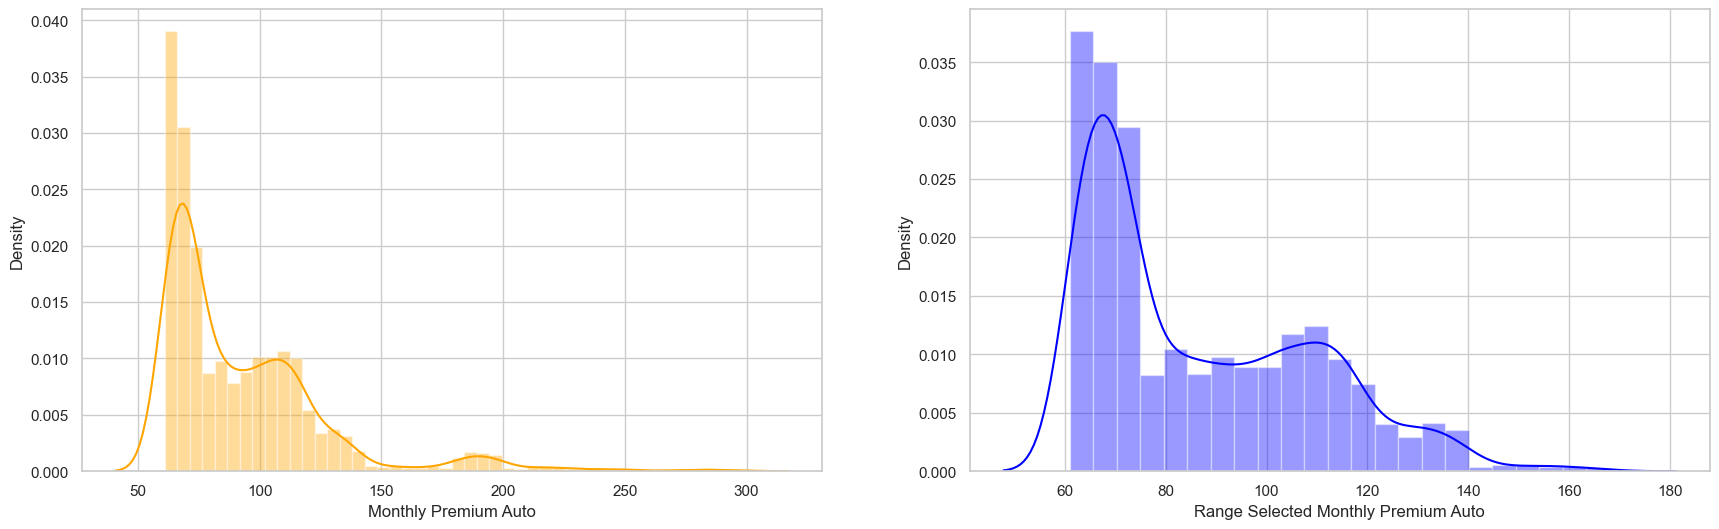

In [39]:
# Melakukan filtering pada data thd Monthly Premium Auto
df_model = df_model[(df_model['Monthly Premium Auto'] <= 168.0)]

# Plot distribusi data sebelum dan sesudah filtering
fig, axes = plt.subplots(1,2, figsize=(21, 6))
sns.distplot(df['Monthly Premium Auto'], ax=axes[0], color='orange')
sns.distplot(df_model['Monthly Premium Auto'], ax=axes[1], color='blue')
axes[0].set_xlabel('Monthly Premium Auto')
axes[1].set_xlabel('Range Selected Monthly Premium Auto');

In [40]:
# Outliers pada fitur Total Claim Amount
find_anomalies(df_model['Total Claim Amount'])

IQR: 274.990473
limit_bawah: -221.87618249999997
limit_atas: 878.0857095


In [41]:
# Cek deskriptif statistik kolom Total Claim Amount
df_model['Total Claim Amount'].describe()

count    3528.000000
mean      339.647215
std       200.700451
min         0.423310
25%       190.609527
50%       326.793442
75%       465.600000
max      1265.570302
Name: Total Claim Amount, dtype: float64

In [42]:
# Cek Total Claim Amount > 900
df_model[df_model['Total Claim Amount'] > 900].count()['Total Claim Amount']

np.int64(40)

In [43]:
df_model[df_model['Total Claim Amount'] > 878.08].sort_values(by = 'Coverage')

,Vehicle Class,Coverage,Renew Offer Type,EmploymentStatus,Marital Status,Education,Number of Policies,Monthly Premium Auto,Total Claim Amount,Income,Customer Lifetime Value
5626,SUV,Basic,Offer1,Medical Leave,Divorced,High School or Below,6.0,117.0,1138.255325,17331.0,8991.984520
2376,SUV,Basic,Offer1,Disabled,Married,Bachelor,3.0,105.0,1126.657780,20369.0,8186.308757
265,SUV,Basic,Offer1,Employed,Single,College,4.0,112.0,1169.409787,53173.0,8736.501241
194,SUV,Basic,Offer2,Medical Leave,Married,College,2.0,100.0,1177.323534,16266.0,11513.355490
2320,SUV,Basic,Offer3,Employed,Divorced,Bachelor,2.0,118.0,1197.713861,36261.0,14057.421250
4692,SUV,Extended,Offer3,Employed,Married,College,1.0,135.0,972.000000,21440.0,5391.078171
3978,Sports Car,Extended,Offer1,Medical Leave,Married,Bachelor,2.0,122.0,878.400000,22854.0,36860.907980
3948,SUV,Extended,Offer2,Employed,Single,College,2.0,136.0,979.200000,22022.0,46611.873750
3907,Four-Door Car,Extended,Offer1,Employed,Divorced,Bachelor,3.0,93.0,1101.054320,52920.0,7325.892726
5465,SUV,Extended,Offer3,Employed,Married,Bachelor,1.0,122.0,1134.960471,37406.0,4864.527356


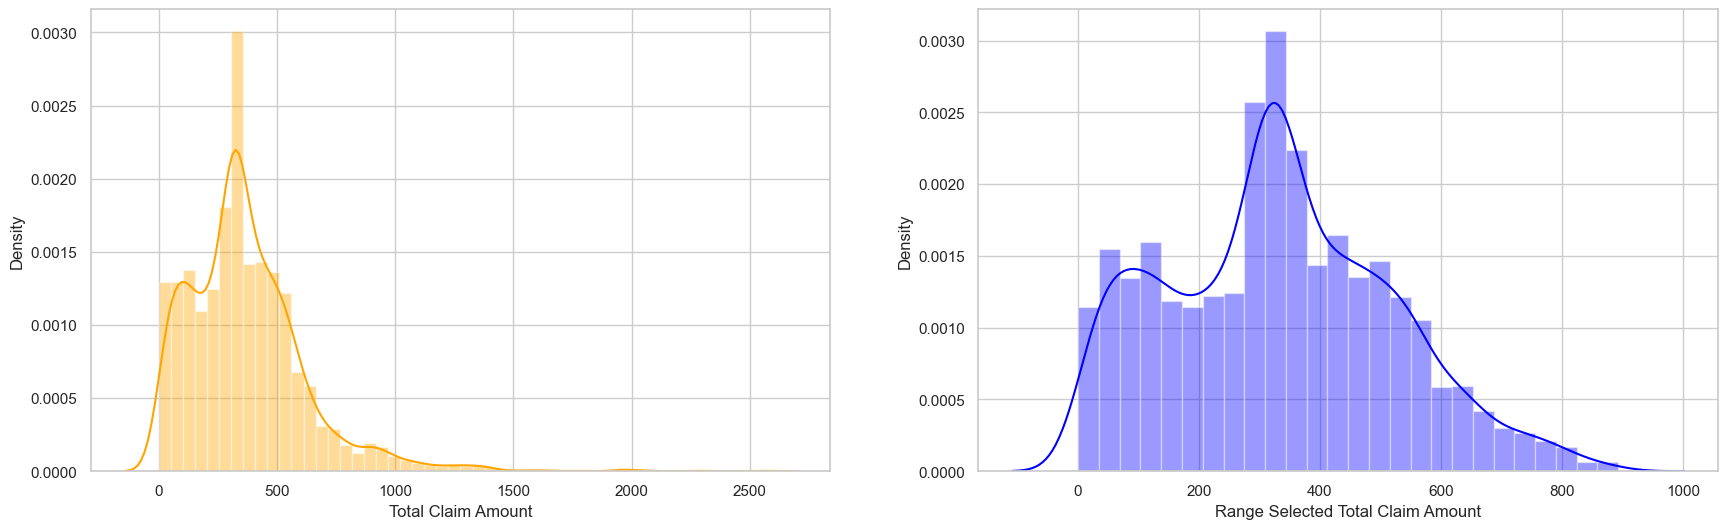

In [44]:
# Melakukan filtering pada data thd Total Claim Amount
df_model = df_model[(df_model['Total Claim Amount'] <= 900)]

# Plot distribusi data sebelum dan sesudah filtering
fig, axes = plt.subplots(1,2, figsize=(21, 6))
sns.distplot(df['Total Claim Amount'], ax=axes[0], color='orange')
sns.distplot(df_model['Total Claim Amount'], ax=axes[1], color='blue')
axes[0].set_xlabel('Total Claim Amount')
axes[1].set_xlabel('Range Selected Total Claim Amount');

In [45]:
# Cek dataset yg sudah bersih dari outliers
df_model.head(10)

,Vehicle Class,Coverage,Renew Offer Type,EmploymentStatus,Marital Status,Education,Number of Policies,Monthly Premium Auto,Total Claim Amount,Income,Customer Lifetime Value
0,Four-Door Car,Extended,Offer1,Retired,Divorced,High School or Below,2.0,90.0,571.479602,11828.0,10083.486880
1,Four-Door Car,Basic,Offer1,Employed,Married,College,6.0,62.0,114.514440,44762.0,4943.386117
2,Two-Door Car,Basic,Offer1,Retired,Married,Master,2.0,62.0,257.248789,21514.0,11981.984810
3,Four-Door Car,Premium,Offer3,Disabled,Married,High School or Below,1.0,116.0,556.800000,17913.0,4550.856045
4,Two-Door Car,Basic,Offer3,Medical Leave,Married,High School or Below,1.0,62.0,355.820799,19030.0,2372.155492
5,SUV,Basic,Offer2,Employed,Married,Bachelor,8.0,107.0,85.063708,94389.0,8649.700578
6,Four-Door Car,Premium,Offer2,Employed,Married,High School or Below,2.0,101.0,584.567645,25419.0,12052.984090
7,Four-Door Car,Basic,Offer2,Employed,Married,College,1.0,66.0,144.987956,26477.0,2621.116054
8,Four-Door Car,Basic,Offer2,Employed,Married,Bachelor,5.0,65.0,264.563772,36615.0,5243.828046
9,Four-Door Car,Premium,Offer3,Employed,Divorced,College,3.0,117.0,582.781896,59624.0,9156.322563


In [46]:
# Cek kembali info dataset
df_model.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3488 entries, 0 to 5666
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Vehicle Class            3488 non-null   object 
 1   Coverage                 3488 non-null   object 
 2   Renew Offer Type         3488 non-null   object 
 3   EmploymentStatus         3488 non-null   object 
 4   Marital Status           3488 non-null   object 
 5   Education                3488 non-null   object 
 6   Number of Policies       3488 non-null   float64
 7   Monthly Premium Auto     3488 non-null   float64
 8   Total Claim Amount       3488 non-null   float64
 9   Income                   3488 non-null   float64
 10  Customer Lifetime Value  3488 non-null   float64
dtypes: float64(5), object(6)
memory usage: 327.0+ KB


In [47]:
df_model.columns

Index(['Vehicle Class', 'Coverage', 'Renew Offer Type', 'EmploymentStatus',
       'Marital Status', 'Education', 'Number of Policies',
       'Monthly Premium Auto', 'Total Claim Amount', 'Income',
       'Customer Lifetime Value'],
      dtype='object')

#### **3. Data Preprocessing**

**-- Encoding**

- `OneHotEncoding`: 'Vehicle Class', 'EmploymentStatus', 'Marital Status'
- `Ordinal`: 'Education', 'Renew Offer Type', 'Coverage'


**Target**: 'Customer Lifetime Value'

In [48]:
df_model.columns

Index(['Vehicle Class', 'Coverage', 'Renew Offer Type', 'EmploymentStatus',
       'Marital Status', 'Education', 'Number of Policies',
       'Monthly Premium Auto', 'Total Claim Amount', 'Income',
       'Customer Lifetime Value'],
      dtype='object')

In [49]:
# Cek jumlah value unik
df_model.select_dtypes('object').nunique()

Vehicle Class       4
Coverage            3
Renew Offer Type    4
EmploymentStatus    4
Marital Status      3
Education           5
dtype: int64

In [50]:
# Cek values pada feature bertipe data: object
def cek_semua_unique_values(df):
    obj_columns = df.select_dtypes(include=['object']).columns  # Pilih kolom bertipe object
    for col in obj_columns:
        print(f"Unique values pada '{col}':")
        print(df[col].unique())
        print("-" * 50)

cek_semua_unique_values(df_model)


Unique values pada 'Vehicle Class':
['Four-Door Car' 'Two-Door Car' 'SUV' 'Sports Car']
--------------------------------------------------
Unique values pada 'Coverage':
['Extended' 'Basic' 'Premium']
--------------------------------------------------
Unique values pada 'Renew Offer Type':
['Offer1' 'Offer3' 'Offer2' 'Offer4']
--------------------------------------------------
Unique values pada 'EmploymentStatus':
['Retired' 'Employed' 'Disabled' 'Medical Leave']
--------------------------------------------------
Unique values pada 'Marital Status':
['Divorced' 'Married' 'Single']
--------------------------------------------------
Unique values pada 'Education':
['High School or Below' 'College' 'Master' 'Bachelor' 'Doctor']
--------------------------------------------------


In [51]:
# preprocessing 
from sklearn.preprocessing import OneHotEncoder 
from category_encoders import OrdinalEncoder, BinaryEncoder  
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler 
from sklearn.compose import ColumnTransformer 

In [52]:
# Mengubah fitur kategorikal menjadi numerikal

transformer = ColumnTransformer(
    transformers=[
        ('OneHot', OneHotEncoder(drop='first'), ['Vehicle Class', 'EmploymentStatus', 'Marital Status']),
        ('Ordinal', OrdinalEncoder(), ['Education', 'Renew Offer Type', 'Coverage']),
        ('Robust', RobustScaler(), ['Monthly Premium Auto', 'Total Claim Amount', 'Income', 'Number of Policies'])
    ],
    remainder='passthrough'
)

#### **4. Modeling**

**Data Splitting**

In [53]:
# Define X and y
X = df_model.drop(['Customer Lifetime Value'], axis=1)
y = df_model['Customer Lifetime Value']

**Train and Test Splitting**

In [54]:
df_model.shape

(3488, 11)

In [55]:
# Splitting
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.2,
    random_state=0
)

**Choose a Benchmark Model**

In [56]:
# Define algoritma yang digunakan
lr = LinearRegression()
knn = KNeighborsRegressor()
dt = DecisionTreeRegressor(random_state=1)
rf = RandomForestRegressor(random_state=1)
xgb = XGBRegressor(random_state=1)

# Pemodelan dilakukan dalam skala logaritmik, namun kemudian di-inverse kembali untuk interpretasi
log_lr = TransformedTargetRegressor(lr, func=np.log, inverse_func=np.exp)
log_knn = TransformedTargetRegressor(knn, func=np.log, inverse_func=np.exp)
log_dt = TransformedTargetRegressor(dt, func=np.log, inverse_func=np.exp)
log_rf = TransformedTargetRegressor(rf, func=np.log, inverse_func=np.exp)
log_xgb = TransformedTargetRegressor(xgb, func=np.log, inverse_func=np.exp)

# Kandidat algoritma
models = [log_lr, log_knn, log_dt, log_rf, log_xgb]

score_rmse = []
nilai_mean_rmse = []
nilai_std_rmse = []

score_mae = []
nilai_mean_mae = []
nilai_std_mae = []

score_mape = []
nilai_mean_mape = []
nilai_std_mape = []

# Mencari algoritma terbaik berdasarkan tiap metrics
for i in models:
    
    crossval = KFold(n_splits=5, shuffle=True, random_state=1)

    estimator = Pipeline([
        ('preprocessing', transformer),
        ('model', i)
    ])

    # RMSE
    model_cv_rmse = cross_val_score(
        estimator, 
        X_train, 
        y_train, 
        cv=crossval, 
        scoring='neg_root_mean_squared_error', 
        error_score='raise'
        )

    print(model_cv_rmse, i)

    score_rmse.append(model_cv_rmse)
    nilai_mean_rmse.append(model_cv_rmse.mean())
    nilai_std_rmse.append(model_cv_rmse.std())

    # MAE
    model_cv_mae = cross_val_score(
        estimator, 
        X_train, 
        y_train, 
        cv=crossval, 
        scoring='neg_mean_absolute_error', 
        error_score='raise'
        )

    print(model_cv_mae, i)

    score_mae.append(model_cv_mae)
    nilai_mean_mae.append(model_cv_mae.mean())
    nilai_std_mae.append(model_cv_mae.std())

    # MAPE
    model_cv_mape = cross_val_score(
        estimator, 
        X_train, 
        y_train, 
        cv=crossval, 
        scoring='neg_mean_absolute_percentage_error', 
        error_score='raise'
        )

    print(model_cv_mape, i)

    score_mape.append(model_cv_mape)
    nilai_mean_mape.append(model_cv_mape.mean())
    nilai_std_mape.append(model_cv_mape.std())

[-6308.26597553 -6150.50308486 -6954.59491685 -5833.27688623
 -5854.68393346] TransformedTargetRegressor(func=<ufunc 'log'>, inverse_func=<ufunc 'exp'>,
                           regressor=LinearRegression())
[-3510.96715717 -3415.15370175 -3744.67428511 -3251.62651246
 -3427.34430627] TransformedTargetRegressor(func=<ufunc 'log'>, inverse_func=<ufunc 'exp'>,
                           regressor=LinearRegression())
[-0.40715479 -0.41545401 -0.42847562 -0.42546943 -0.43420816] TransformedTargetRegressor(func=<ufunc 'log'>, inverse_func=<ufunc 'exp'>,
                           regressor=LinearRegression())
[-6224.98716096 -6018.84018449 -7176.53004104 -6046.46582369
 -5839.14800873] TransformedTargetRegressor(func=<ufunc 'log'>, inverse_func=<ufunc 'exp'>,
                           regressor=KNeighborsRegressor())
[-3346.18699785 -3393.06694588 -3818.04940033 -3358.32301678
 -3326.49537391] TransformedTargetRegressor(func=<ufunc 'log'>, inverse_func=<ufunc 'exp'>,
                    

In [57]:
# Evaluasi hasil dari 5 kandidat algoritma yang digunakan
pd.DataFrame({
    'Model': ['Linear Regression', 'KNN Regressor', 'DecisionTree Regressor', 'RandomForest Regressor', 'XGBoost Regressor'],
    'Mean_RMSE': nilai_mean_rmse,
    'Std_RMSE': nilai_std_rmse,
    'Mean_MAE': nilai_mean_mae,
    'Std_MAE': nilai_std_mae,
    'Mean_MAPE': nilai_mean_mape,
    'Std_MAPE': nilai_std_mape
})

,Model,Mean_RMSE,Std_RMSE,Mean_MAE,Std_MAE,Mean_MAPE,Std_MAPE
0,Linear Regression,-6220.264959,408.720110,-3469.953193,161.021033,-0.422152,0.009655
1,KNN Regressor,-6261.194244,473.733550,-3448.424347,186.077684,-0.433392,0.023940
2,DecisionTree Regressor,-5054.317001,607.180844,-1815.887388,253.852697,-0.133418,0.016344
3,RandomForest Regressor,-3847.741955,368.126971,-1530.633194,163.296672,-0.104621,0.007457
4,XGBoost Regressor,-4015.270307,321.955748,-1680.675056,114.237458,-0.130485,0.005343


- Berdasarkan nilai RMSE, MAE, dan MAPE, **Random Forest** adalah model terbaik.
- Selanjutnya, akan dilakukan prediksi pada test set dengan model **Random Forest**

Prediksi pada test set dengan menggunakan model RandomForest Regressor

In [58]:
# Benchmark model terbaik
models = {
    'RandomForest': RandomForestRegressor(random_state=1)
}

score_rmse = []
score_mae = []
score_mape = []

# Prediksi pada test set
for i in models:

    model = Pipeline([
        ('preprocessing', transformer),
        ('model', models[i])
        ])

    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    score_rmse.append(np.sqrt(mean_squared_error(y_test, y_pred)))
    score_mae.append(mean_absolute_error(y_test, y_pred))
    score_mape.append(mean_absolute_percentage_error(y_test, y_pred))

score_before_tuning = pd.DataFrame({'RMSE': score_rmse, 'MAE': score_mae, 'MAPE': score_mape}, index=models.keys())
score_before_tuning

,RMSE,MAE,MAPE
RandomForest,3539.757262,1509.291122,0.120727


In [60]:
# Jumlah pohon dalam hutan
n_estimators = list(range(100, 201, 10))

# Kedalaman maksimum pohon
max_depth = [None] + list(range(1, 21))

# Jumlah minimum sampel untuk melakukan split
min_samples_split = list(range(2, 11))

# Jumlah minimum sampel per daun
min_samples_leaf = list(range(1, 11))

# Jumlah fitur yang digunakan untuk setiap split
max_features = [None, 'sqrt', 'log2', 0.5, 0.75, 1.0]

# Mengunci random state
random_state = [42]

# Apakah akan menggunakan bootstrap samples ketika membangun pohon
bootstrap = [True, False]

# Kriteria yang digunakan untuk pembagian (split) di dalam pohon
criterion = ['squared_error', 'absolute_error', 'poisson']

# Hyperparameter space untuk Random Forest
hyperparam_space_rfr = {
    'model__n_estimators': n_estimators,
    'model__max_depth': max_depth,
    'model__min_samples_split': min_samples_split,
    'model__min_samples_leaf': min_samples_leaf,
    'model__max_features': max_features,
    'model__bootstrap': bootstrap,
    'model__criterion': criterion,
    'model__random_state': random_state
}

In [61]:
# Benchmark model dengan hyperparameter tuning
rfr = RandomForestRegressor(random_state=42)

# Membuat algorithm chains
estimator_rfr = Pipeline([
        ('preprocessing', transformer),
        ('model', rfr)
        ])

# Hyperparameter tuning menggunakan RandomizedSearchCV
random_rfr = RandomizedSearchCV(
    estimator=estimator_rfr, 
    param_distributions=hyperparam_space_rfr,
    n_iter=50,
    cv=crossval, 
    scoring=['neg_root_mean_squared_error', 'neg_mean_absolute_error', 'neg_mean_absolute_percentage_error'], 
    n_jobs=-1,
    refit='neg_root_mean_squared_error', # Hanya bisa memilih salah satu metric untuk optimisasi
    random_state=42  
)

In [62]:
# Fitting data training untuk mencari parameter terbaik
random_rfr.fit(X_train, y_train)

RandomizedSearchCV(cv=KFold(n_splits=5, random_state=1, shuffle=True),
                   estimator=Pipeline(steps=[('preprocessing',
                                              ColumnTransformer(remainder='passthrough',
                                                                transformers=[('OneHot',
                                                                               OneHotEncoder(drop='first'),
                                                                               ['Vehicle '
                                                                                'Class',
                                                                                'EmploymentStatus',
                                                                                'Marital '
                                                                                'Status']),
                                                                              ('Ordinal',
                                                                               OrdinalEncoder(),
                                                                               ['Education',
                                                                                'Renew '
                                                                                'Offer '
                                                                                'Type',
                                                                                'Coverage']),
                                                                              ('Robust',
                                                                               Rob...
                                                                0.75, 1.0],
                                        'model__min_samples_leaf': [1, 2, 3, 4,
                                                                    5, 6, 7, 8,
                                                                    9, 10],
                                        'model__min_samples_split': [2, 3, 4, 5,
                                                                     6, 7, 8, 9,
                                                                     10],
                                        'model__n_estimators': [100, 110, 120,
                                                                130, 140, 150,
                                                                160, 170, 180,
                                                                190, 200],
                                        'model__random_state': [42]},
                   random_state=42, refit='neg_root_mean_squared_error',
                   scoring=['neg_root_mean_squared_error',
                            'neg_mean_absolute_error',
                            'neg_mean_absolute_percentage_error'])

In [63]:
# Melihat hasil tuning dalam bentuk dataframe. Diurutkan berdasarkan RMSE, MAE & MAPE
results_df = pd.DataFrame(random_rfr.cv_results_).sort_values(by=['rank_test_neg_mean_absolute_error', 'rank_test_neg_mean_absolute_percentage_error']).head()
results_df

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_model__random_state,param_model__n_estimators,param_model__min_samples_split,param_model__min_samples_leaf,param_model__max_features,param_model__max_depth,...,std_test_neg_mean_absolute_error,rank_test_neg_mean_absolute_error,split0_test_neg_mean_absolute_percentage_error,split1_test_neg_mean_absolute_percentage_error,split2_test_neg_mean_absolute_percentage_error,split3_test_neg_mean_absolute_percentage_error,split4_test_neg_mean_absolute_percentage_error,mean_test_neg_mean_absolute_percentage_error,std_test_neg_mean_absolute_percentage_error,rank_test_neg_mean_absolute_percentage_error
44,47.705663,7.678500,0.077107,0.010603,42,190,6,5,0.5,9,...,147.814929,1,-0.094790,-0.092978,-0.100367,-0.084775,-0.086735,-0.091929,0.005633,1
41,20.621002,2.669426,0.047383,0.003111,42,100,2,8,0.5,15,...,133.610760,2,-0.099046,-0.096236,-0.102129,-0.089701,-0.090670,-0.095556,0.004775,3
25,19.439085,1.324932,0.049472,0.002348,42,110,6,7,None,10,...,154.742544,3,-0.109677,-0.099144,-0.109422,-0.092867,-0.096576,-0.101537,0.006840,4
35,32.934828,6.252070,0.047280,0.001712,42,130,7,4,0.75,4,...,140.318539,4,-0.098422,-0.093254,-0.100601,-0.091602,-0.091430,-0.095062,0.003752,2
24,29.612733,5.058082,0.066229,0.004780,42,160,5,4,None,15,...,142.212265,5,-0.113505,-0.107811,-0.115310,-0.097297,-0.105706,-0.107926,0.006381,6


In [64]:
# Cek skor dan params terbaik
print('Random Forest Regression')
print('Best_score:', random_rfr.best_score_)
print('Best_params:', random_rfr.best_params_)

Random Forest Regression
Best_score: -3703.6929997702728
Best_params: {'model__random_state': 42, 'model__n_estimators': 150, 'model__min_samples_split': 2, 'model__min_samples_leaf': 6, 'model__max_features': 1.0, 'model__max_depth': 6, 'model__criterion': 'squared_error', 'model__bootstrap': True}


**Predict to Test Set with the Tuned Model**

Melakukan prediksi pada test set dengan menggunakan model Random Forest Regression dan hyperparameter terpilih.

In [65]:
# Model RandomForest
model = {'RFR': RandomForestRegressor(random_state=1)}

# Define model terhadap estimator terbaik
rfr_tuning = random_rfr.best_estimator_

# Fitting model
rfr_tuning.fit(X_train, y_train)

# Predict test set
y_pred_rfr_tuning = rfr_tuning.predict(X_test)

# Simpan nilai metrics RMSE, MAE & MAPE setelah tuning
rmse_rfr_tuning = np.sqrt(mean_squared_error(y_test, y_pred_rfr_tuning))
mae_rfr_tuning = mean_absolute_error(y_test, y_pred_rfr_tuning)
mape_rfr_tuning = mean_absolute_percentage_error(y_test, y_pred_rfr_tuning)

# Simpan hasil evaluasi ke dalam DataFrame
score_after_tuning_rfr = pd.DataFrame({'RMSE': rmse_rfr_tuning, 'MAE': mae_rfr_tuning, 'MAPE': mape_rfr_tuning}, index=model.keys())
score_after_tuning_rfr

,RMSE,MAE,MAPE
RFR,3317.616162,1455.726362,0.116307


**Performance Comparison**

Perbandingan performa model Random Forest sebelum dan sesudah dilakukan hyperparameter tuning.

In [66]:
# Sebelum hyperparameter tuning
pd.DataFrame(score_before_tuning)

,RMSE,MAE,MAPE
RandomForest,3539.757262,1509.291122,0.120727


In [67]:
# Setelah hyperparameter tuning
score_after_tuning_rfr

,RMSE,MAE,MAPE
RFR,3317.616162,1455.726362,0.116307


Model mengalami peningkatan performa (nilai RMSE, MAE, dan MAPE berkurang) dengan dilakukannya hyperparameter tuning, walaupun hanya sedikit.

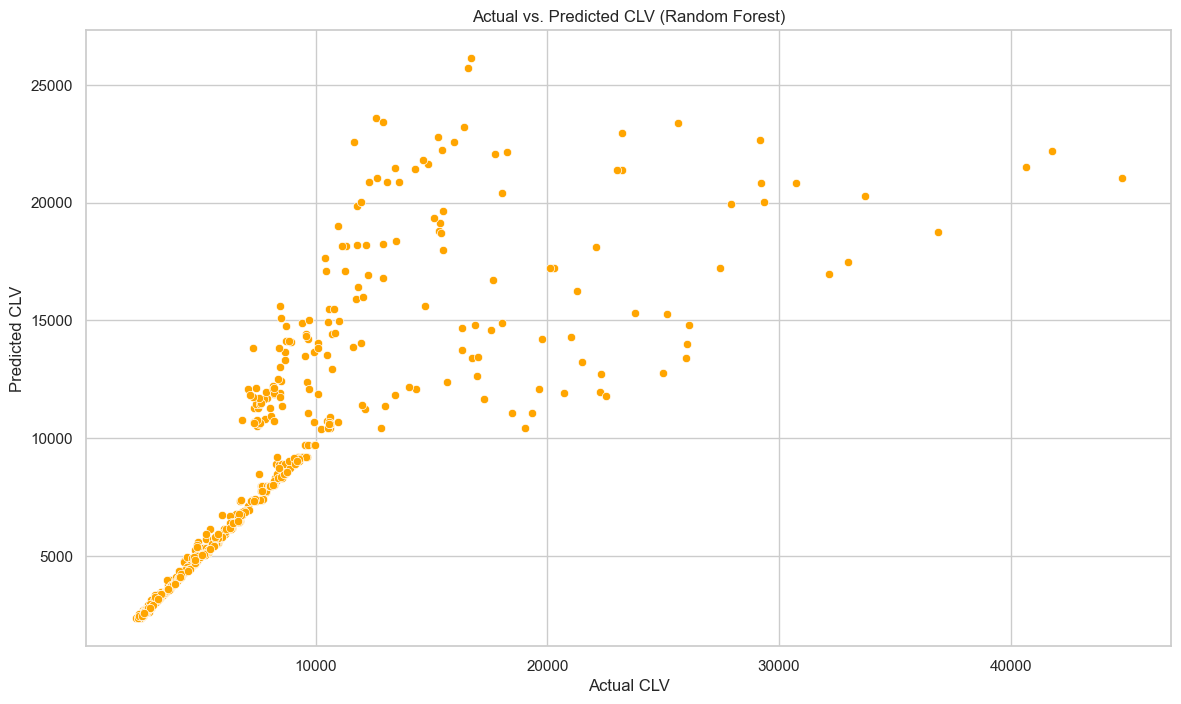

In [68]:
plt.figure(figsize=(14, 8))
sns.scatterplot(x=y_test, y=y_pred_rfr_tuning, color='orange').set(
    title='Actual vs. Predicted CLV (Random Forest)', 
    xlabel='Actual CLV', 
    ylabel='Predicted CLV'
)
plt.show()

Dengan MAPE 11%, menurut Lewis (1982) model tersebut memiliki performa yang baik dalam memprediksi, dengan kesalahan rata-rata persentase absolut di bawah 20%

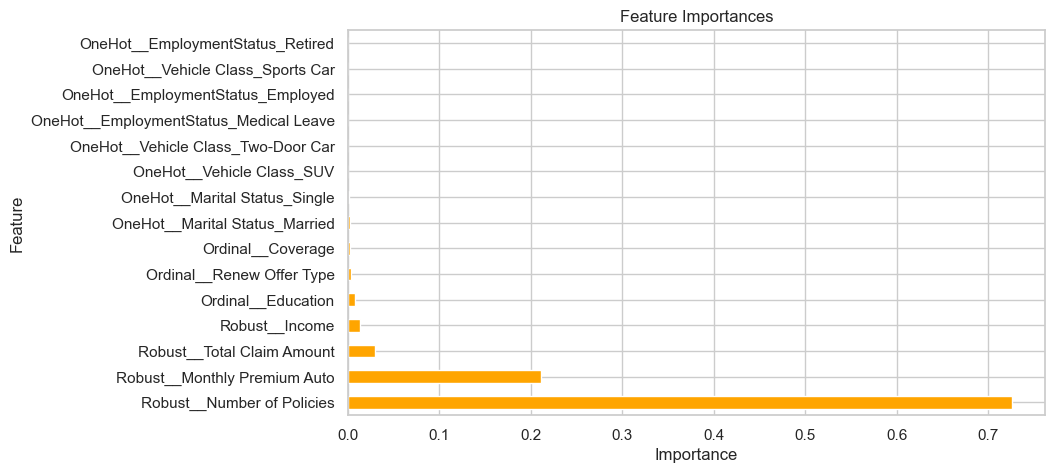

In [69]:
# Akses model dari dictionary
model = rfr_tuning['model']

# Ambil feature importances
importances = model.feature_importances_

# Dapatkan nama fitur setelah transformasi
feature_names = transformer.get_feature_names_out()  # Ganti dengan metode atau cara sesuai dengan transformer yang Anda gunakan

# Buat Series dengan importances dan nama fitur
feature_importances = pd.Series(importances, index=feature_names).sort_values(ascending=False)

# Plot
plt.figure(figsize=(9, 5))
feature_importances.plot(kind='barh', title='Feature Importances', color='orange')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

#### **5. Conclusion**

- **Fitur yang paling berpengaruh** terhadap Customer Lifetime Value (CLV) adalah **Number of Policies**.
- **Random Forest Regressor** terbukti sebagai **model terbaik**, dengan nilai evaluasi sebagai berikut:
  - RMSE: 3,317
  - MAE: 1,455
  - MAPE: 11%
- Dengan **MAPE sebesar 11%, model memiliki kinerja yang baik dalam prediksi**, karena kesalahan rata-rata persentase absolut berada di bawah 20%, sesuai dengan standar yang dikemukakan oleh Lewis (1992).

#### **6. Recommendation**

- Karena Number of Policies adalah faktor paling berpengaruh terhadap CLV, strategi peningkatan jumlah polis per pelanggan dapat diterapkan.
- Menambahkan fitur-fitur baru yang bisa membantu meningkatkan performa model prediksi dan memahami lebih dalam faktor-faktor yang memengaruhi CLV

**Save Model**

In [70]:
## Save model
# import pickle

# estimator = Pipeline([('preprocess', transformer), ('model', RandomForestRegressor())])
# estimator.fit(X_train, y_train)

# pickle.dump(estimator, open('Model_CLV_RFR.pkl', 'wb'))

In [ ]:
# Load model yang telah disimpan
# loaded_model = pickle.load(open('Model_CLV_RFR.pkl', 'rb'))

In [ ]:
# np.sqrt(mean_squared_error(y_test, loaded_model.predict(X_test)))
